In [1]:
import cProfile


""" 
Looking at execution times in 'result_presentation.ipynb'
we can check following functions suspected of being bottlenecks:

- give_data_with_allowed_and_not_allowed_speed()
- plot_points_on_map()
- give_fastest_places()
- give_df_with_arrivals()
"""

""" 
Reading saved data,
once DataFrame is read we modify it -
we change column names, modify time format, and add bus_stop_id 
"""

from Data_reading.reading import give_modified_bus_stops_df
from Data_reading.reading import give_modified_lines_stops_df
from Data_reading.reading import give_modified_curr_positions_df
from Data_reading.reading import give_modified_time_tables_df

def give_data(funct_to_get):
    data = funct_to_get(late_hours = False) 
    return data

bus_stops_df = give_data(give_modified_bus_stops_df)
lines_stops_df = give_data(give_modified_lines_stops_df)
positions_df = give_data(give_modified_curr_positions_df)
time_tables_df = give_data(give_modified_time_tables_df)


c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value],


In [2]:
from Speed.speed import give_data_with_allowed_and_not_allowed_speed
from Helpers.dataframe_support import give_positions_from_a_few_minutes

from Helpers.visualization import plot_points_on_map

from Speed.speed import give_dataframe_of_coords_with_line_and_speed
from Speed.fast_localizations import give_fastest_places

In [3]:
import pstats

profiler = cProfile.Profile()
profiler.enable()

def profile_function(func, N = 10):
    func()

    stats = pstats.Stats(profiler)
    stats.sort_stats('cumulative').print_stats(N)  

In [4]:
""" 
testing 'give_data_with_allowed_and_not_allowed_speed' 
"""

positions = give_positions_from_a_few_minutes(positions_df, how_many_minutes = 4)

def test1():
    speed_data_early = give_data_with_allowed_and_not_allowed_speed(positions)
    
profile_function(test1)

         10382615 function calls (10246308 primitive calls) in 6.963 seconds

   Ordered by: cumulative time
   List reduced from 1097 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25/17    0.000    0.000    6.957    0.409 {method 'run' of '_contextvars.Context' objects}
    26/17    0.000    0.000    6.956    0.409 c:\Users\Admin\Lib\asyncio\events.py:82(_run)
        2    0.000    0.000    6.956    3.478 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:519(process_one)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:533(dispatch_queue)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:386(dispatch_shell)
        5    0.000    0.000    6.955    1.391 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\i

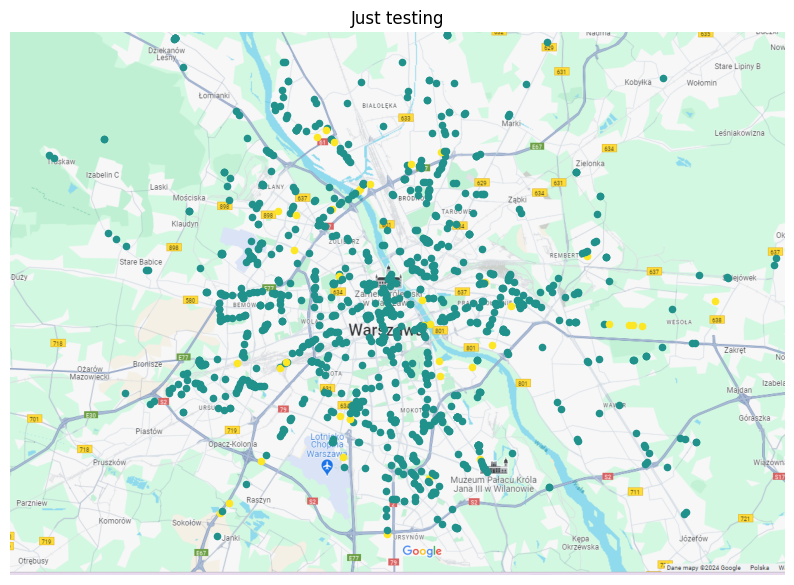

         10382615 function calls (10246308 primitive calls) in 6.963 seconds

   Ordered by: cumulative time
   List reduced from 1097 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25/17    0.000    0.000    6.957    0.409 {method 'run' of '_contextvars.Context' objects}
    26/17    0.000    0.000    6.956    0.409 c:\Users\Admin\Lib\asyncio\events.py:82(_run)
        2    0.000    0.000    6.956    3.478 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:519(process_one)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:533(dispatch_queue)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:386(dispatch_shell)
        5    0.000    0.000    6.955    1.391 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\i

In [7]:
""" 
testing 'plot_points_on_map()' 
"""

data_to_plot = give_data_with_allowed_and_not_allowed_speed(positions)

def test2():
    plot_points_on_map(data_to_plot, title = "Just testing")
    
profile_function(test2, N = 30)

In [9]:
""" 
testing 'plot_points_on_map()' 
"""

from Speed.speed import give_dataframe_of_coords_with_line_and_speed
from Speed.fast_localizations import give_fastest_places
from Helpers.visualization import visualize_overspeed_in_places

speed_and_coords = give_dataframe_of_coords_with_line_and_speed(positions)

def test3():
    give_fastest_places(bus_stops_df, speed_and_coords, how_many = 30)
    
profile_function(test3)

[[[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 ...

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]]
         10382615 function calls (10246308 primitive calls) in 6.963 seconds

   Ordered by: cumulative time
   List reduced from 1097 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25/17    0.000    0.000    6.957    0.409 {method 'run' of '_contextvars.Context' objects}
    26/17    0.000    0.000    6.956    0.409 c:\Users\Admin\Lib\asyncio\events.py:82(_run)
        2    0.000    0.000    6.956    3.478 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:519(process_one)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\

In [16]:
from Helpers.dataframe_support import give_dfs_contain_part_of_vehicles
from Punctuality.arrivals import give_df_with_arrivals

def test4():
    arrivals_df_early = give_df_with_arrivals(positions, lines_stops_df, bus_stops_df)
    
profile_function(test4, N = 50)


         10382615 function calls (10246308 primitive calls) in 6.963 seconds

   Ordered by: cumulative time
   List reduced from 1097 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25/17    0.000    0.000    6.957    0.409 {method 'run' of '_contextvars.Context' objects}
    26/17    0.000    0.000    6.956    0.409 c:\Users\Admin\Lib\asyncio\events.py:82(_run)
        2    0.000    0.000    6.956    3.478 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:519(process_one)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:533(dispatch_queue)
        1    0.000    0.000    6.956    6.956 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py:386(dispatch_shell)
        5    0.000    0.000    6.955    1.391 C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\i